<a href="https://colab.research.google.com/github/eunterko/MAT421/blob/main/ModuleG_Section_21_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 21: Numerical Integration**

# *21.1 Numerical Integration Problem Statement*

The problem statement for numerical integration is: given some function f(x) over the interval [a,b], we want to approximate the integral of this function over this interval. To do so, we will discretize the interval into n+1 points, with a constant spacing h = (b-a)/n, where x_0 = a and x_n = b. In the following sections, we will discuss several different methods for approaching this problem.

# *21.2 Riemanns Integral*

The first method is very straightforward, Riemann Integral approximation. We simply approximate the area of each individual subinterval as a rectangle with width h and height f(x_i) or f(x_{i+1}), where f(x_i) is the left endpoint and f(x_{i+1}) is the right endpoint. Our approximation is then

In [ ]:
# left endpoint Riemann Integral approximation
# \int_a^b f(x)dx \approx \sum_i=0^{n-1} hf(x_i)

# right endpoint Riemann Integral approximation
# \int_a^b f(x)dx \approx \sum_i=1^n hf(x_i)

We can determine the accuracy by taking a Taylor approximation, giving us

In [ ]:
# \int_{x_i}^{x_{i+1}} f(x)dx = hf(x_i) + O(h^2)

Note however that this is the accuracy of just one subinterval. For the accuracy of the entire interval, we multiply by the number of subintervals n = (b-a)/h, which then gives us the accuracy of O(h) for the entire interval. As an example, let's take the left and right endpoint Riemann Integral approximation for f(x) = sin(x) over the interval [0,pi] with 20 grid points:

1.9954413183201947
0.004558681679805332
1.9954413183201947
0.004558681679805332


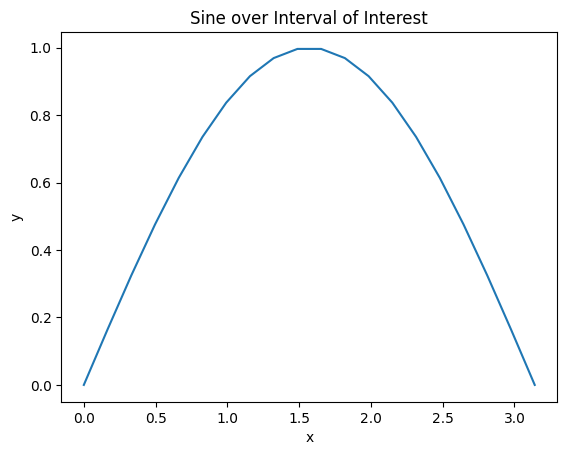

In [37]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

a = 0
b = np.pi
n = 20
h = (b - a) / (n-1)
x = np.linspace(a, b, n)
f = np.sin(x)

plt.plot(x,f)
plt.title('Sine over Interval of Interest');
plt.xlabel('x')
plt.ylabel('y')

riemann_left = h * sum(f[:n-1])
riemann_left_error = 2 - riemann_left

riemann_right = h * sum(f[1::])
riemann_right_error = 2 - riemann_right

print(riemann_left)
print(riemann_left_error)

print(riemann_right)
print(riemann_right_error)

For a more accurate result, we can use the Midpoint Rule, where we essentially do Riemann Integration approximation with the value of f(x) in the middle of each subinterval, as opposed to the left or right endpoints. We'll call this midpoint m_i = (x_{i+1}+x_i)/2. Our approximation is then

In [ ]:
# midpoint rule Riemann Integral approximation
# \int_a^b f(x)dx \approx \sum_i=0^{n-1} hf(m_i)

Once again, we determine accuracy with a Taylor series approximation, giving us

In [ ]:
# \int_{x_i}^{x_{i+1}} f(x)dx = hf(m_i) + O(h^3)

We thus have an accuracy of O(h^3) for each subinterval, and O(h^2) for the entire interval. Let's take a look at the example function from above:

2.00228012007291
-0.002280120072910119


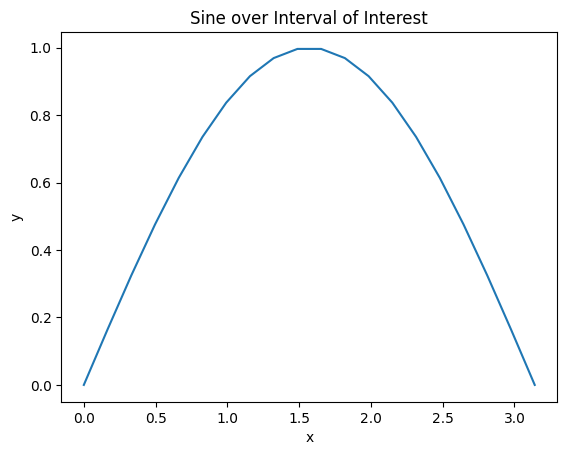

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

a = 0
b = np.pi
n = 20
h = (b - a) / (n-1)
x = np.linspace(a, b, n)
m = (x[:n-1] + x[1:])/2
f = np.sin(x)
f_m = np.sin(m)

plt.plot(x,f)
plt.title('Sine over Interval of Interest');
plt.xlabel('x')
plt.ylabel('y')

riemann_midpoint = h * sum(f_m)
riemann_midpoint_error = 2 - riemann_midpoint

print(riemann_midpoint)
print(riemann_midpoint_error)

As we can see, the midpoint rule yields a more accurate result. Next, we will see another rule that also allows to achieve more accurate results.

# *21.3 Trapezoid Rule*

Following from the previous section, we can now introduce the Trapezoid Rule. Performing Riemann Integral approximation with the Trapezoid Rule, we essentially define a trapezoid in each subinterval, with upper edges defined by the left and right endpoints of each subinterval. Our approximation is then

In [ ]:
# trapezoid rule Riemann Integral approximation
# \int_a^b f(x)dx \approx \sum_i=0^{n-1} h * (f(x_i) + f(x_{i+1})) / 2

Once again, we determine accuracy with a Taylor series approximation, giving us

In [ ]:
# \int_{x_i}^{x_{i+1}} f(x)dx = h * ((f(x_i) + f(x_{i+1})) / 2) + O(h^3)

We see then that this method has the same accuracy as the midpoint rule for both the subinterval and entire interval. Let's look at an example using the same function as before:

1.9954413183201947
0.004558681679805332


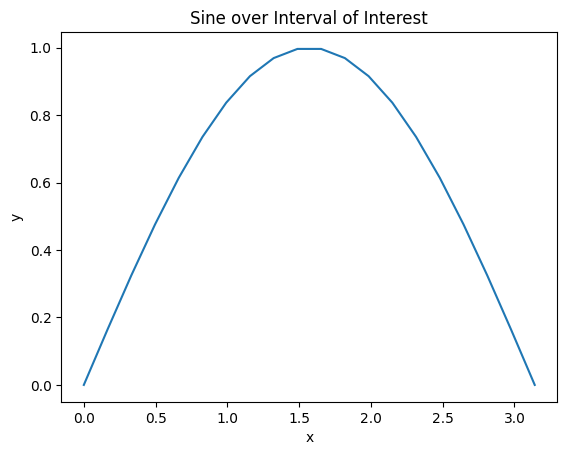

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

a = 0
b = np.pi
n = 20
h = (b - a) / (n-1)
x = np.linspace(a, b, n)
f = np.sin(x)

plt.plot(x,f)
plt.title('Sine over Interval of Interest');
plt.xlabel('x')
plt.ylabel('y')

riemann_trapezoid = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])
riemann_trapezoid_error = 2 - riemann_trapezoid

print(riemann_trapezoid)
print(riemann_trapezoid_error)

Next time, we will consider some further methods to better improve the accuracy of numerical integration.